In [ ]:
pip install opencv-python pytesseract numpy


Saving car.jpg to car.jpg


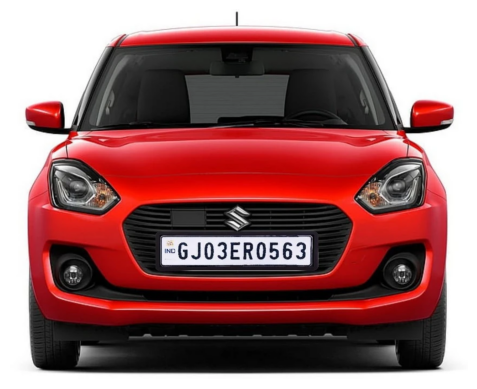

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Get image path
image_path = list(uploaded.keys())[0]

# Open the image using PIL
image = Image.open(image_path)

# Display image using Matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axis for better visualization
plt.show()


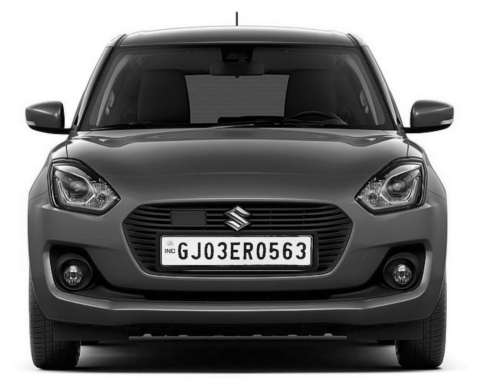

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ensure the image path is correct and the file exists.
image_path = "car.jpg"  # Replace with the correct path if needed
image = cv2.imread(image_path)

# Check if the image was loaded successfully.
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    cv2.imwrite("gray_car.jpg", gray_image)  # Save the grayscale image

    # Display the image using Matplotlib instead of cv2_imshow and waitKey
    plt.imshow(gray_image, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    # Remove cv2.waitKey(0) and cv2.destroyAllWindows()

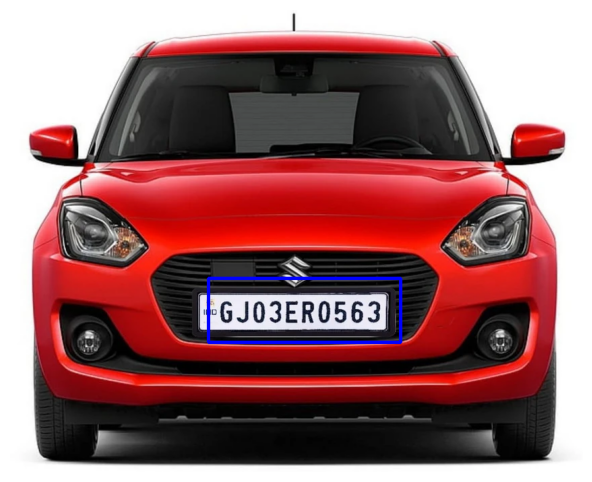

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade for number plate detection
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

# Load the image
image = cv2.imread("car.jpg")  # Replace with your actual image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect number plates in the image
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected number plates
for (x, y, w, h) in plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 3)  # Red rectangle

# Convert image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the processed image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axis
plt.show()


Detected Number Plate Text: G6 JO3ER0563)



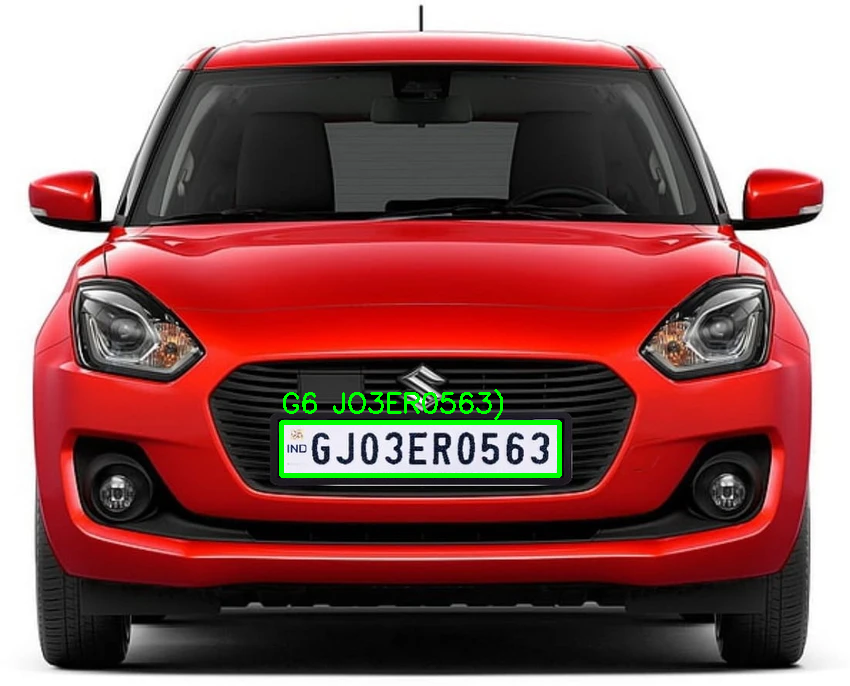

In [19]:
!pip install pytesseract
import cv2
import numpy as np
import pytesseract # Now import pytesseract after installation


# Load the image
image = cv2.imread('car.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise while keeping edges sharp
filtered = cv2.bilateralFilter(gray, 9, 75, 75)

# Apply edge detection
edges = cv2.Canny(filtered, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Detect and highlight number plate
number_plate = None
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # Assuming number plate has 4 corners
        x, y, w, h = cv2.boundingRect(cnt)
        number_plate = image[y:y+h, x:x+w]
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
        break

# Apply OCR to extract characters from number plate
if number_plate is not None:
    # Set the path to the Tesseract executable for Google Colab
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    text = pytesseract.image_to_string(number_plate, config='--psm 8')
    print("Detected Number Plate Text:", text)

    # Display extracted text on the image
    cv2.putText(image, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image using a method suitable for Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(image)

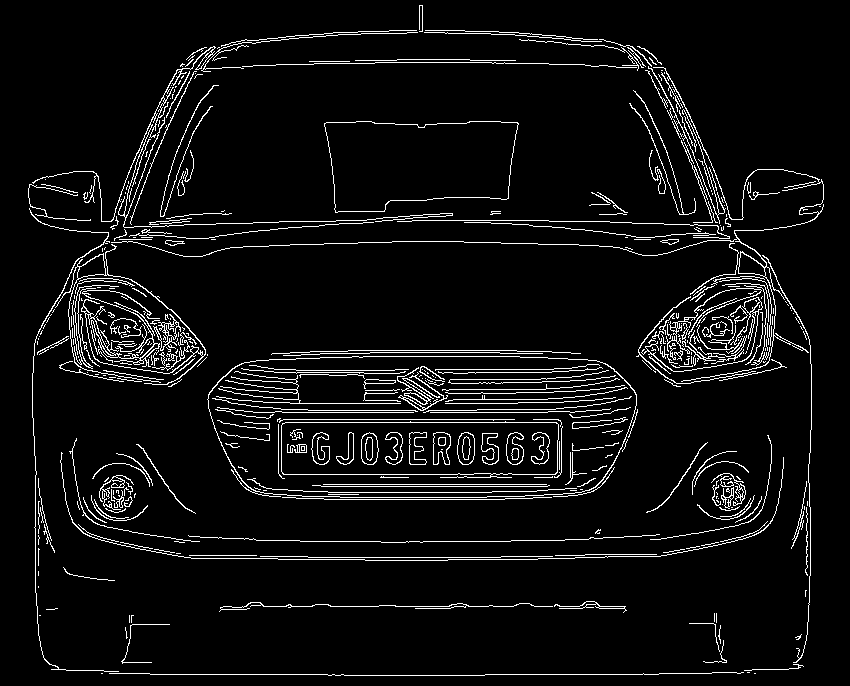

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab


# Load image, ensuring the path is correct
image_path = 'car.jpg'  # Update with the correct path if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    print(f"Error: Could not load image at '{image_path}'. Please check the path.")
else:
    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Display results using cv2_imshow
    cv2_imshow(edges) # Use cv2_imshow for displaying in Colab